In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 1 | arlit
Processing Record 3 of Set 1 | taoudenni
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | udachnyy
Processing Record 6 of Set 1 | khandbari
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | cobija
Processing Record 9 of Set 1 | minab
Processing Record 10 of Set 1 | dingle
Processing Record 11 of Set 1 | marabba
Processing Record 12 of Set 1 | boa vista
Processing Record 13 of Set 1 | yar-sale
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | muros
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | rosetta
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | evanston
Processing Record 21 of Set 1 | santa luzia
Processing Record 22 of Set 1 | illoqqortoormiut
City no

Processing Record 36 of Set 4 | obo
Processing Record 37 of Set 4 | port moresby
Processing Record 38 of Set 4 | krumovgrad
Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | chapleau
Processing Record 41 of Set 4 | ayagoz
Processing Record 42 of Set 4 | champerico
Processing Record 43 of Set 4 | ancud
Processing Record 44 of Set 4 | salinopolis
Processing Record 45 of Set 4 | pampas
Processing Record 46 of Set 4 | pimenta bueno
Processing Record 47 of Set 4 | biak
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | riverton
Processing Record 50 of Set 4 | hithadhoo
Processing Record 1 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 5 | lar
Processing Record 3 of Set 5 | magugu
Processing Record 4 of Set 5 | liverpool
Processing Record 5 of Set 5 | moron
Processing Record 6 of Set 5 | kloulklubed
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of Set 5 | guaranesia
Processing Record 9 of Set 5 | ponta 

Processing Record 26 of Set 8 | yenagoa
Processing Record 27 of Set 8 | navirai
Processing Record 28 of Set 8 | saint-augustin
Processing Record 29 of Set 8 | meulaboh
Processing Record 30 of Set 8 | port macquarie
Processing Record 31 of Set 8 | kirundo
Processing Record 32 of Set 8 | tripoli
Processing Record 33 of Set 8 | ronneby
Processing Record 34 of Set 8 | yulara
Processing Record 35 of Set 8 | comodoro rivadavia
Processing Record 36 of Set 8 | hofn
Processing Record 37 of Set 8 | eyl
Processing Record 38 of Set 8 | baruun-urt
Processing Record 39 of Set 8 | katobu
Processing Record 40 of Set 8 | moerai
Processing Record 41 of Set 8 | usak
Processing Record 42 of Set 8 | kombissiri
Processing Record 43 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 8 | freetown
Processing Record 45 of Set 8 | arona
Processing Record 46 of Set 8 | grand gaube
Processing Record 47 of Set 8 | union
Processing Record 48 of Set 8 | port augusta
Processing Record 49 of S

Processing Record 16 of Set 12 | akyab
Processing Record 17 of Set 12 | jubb jannin
City not found. Skipping...
Processing Record 18 of Set 12 | port-gentil
Processing Record 19 of Set 12 | aranos
Processing Record 20 of Set 12 | flin flon
Processing Record 21 of Set 12 | rungata
City not found. Skipping...
Processing Record 22 of Set 12 | zonalnaya stantsiya
Processing Record 23 of Set 12 | qurayyat
Processing Record 24 of Set 12 | drochia
Processing Record 25 of Set 12 | sassandra
Processing Record 26 of Set 12 | manggar
Processing Record 27 of Set 12 | cazaje
City not found. Skipping...
Processing Record 28 of Set 12 | kargasok
Processing Record 29 of Set 12 | porto torres
Processing Record 30 of Set 12 | gold coast
Processing Record 31 of Set 12 | ugoofaaru
Processing Record 32 of Set 12 | mount gambier
Processing Record 33 of Set 12 | balimo
City not found. Skipping...
Processing Record 34 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 35 of Set 12 | wewak

In [9]:
len(city_data)

578

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arlit,18.7369,7.3853,110.52,3,18,9.89,NE,2021-05-29 15:06:58
1,Taoudenni,22.6783,-3.9836,115.92,5,21,17.20,ML,2021-05-29 15:06:59
2,Qaanaaq,77.4840,-69.3632,32.68,92,42,6.08,GL,2021-05-29 15:06:59
3,Udachnyy,66.4167,112.4000,55.02,54,7,8.23,RU,2021-05-29 15:06:59
4,Khandbari,27.3747,87.2039,72.72,87,73,1.59,NP,2021-05-29 15:07:00
5,New Norfolk,-42.7826,147.0587,45.90,75,42,3.04,AU,2021-05-29 15:07:00
6,Cobija,-11.0267,-68.7692,86.99,48,60,3.62,BO,2021-05-29 15:07:01
7,Minab,27.1467,57.0801,98.10,30,0,7.16,IR,2021-05-29 15:07:01
8,Dingle,10.9995,122.6711,78.85,88,99,2.68,PH,2021-05-29 15:07:01
9,Marabba,12.3500,32.1833,103.42,18,10,11.86,SD,2021-05-29 15:07:02


In [13]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arlit,NE,2021-05-29 15:06:58,18.7369,7.3853,110.52,3,18,9.89
1,Taoudenni,ML,2021-05-29 15:06:59,22.6783,-3.9836,115.92,5,21,17.20
2,Qaanaaq,GL,2021-05-29 15:06:59,77.4840,-69.3632,32.68,92,42,6.08
3,Udachnyy,RU,2021-05-29 15:06:59,66.4167,112.4000,55.02,54,7,8.23
4,Khandbari,NP,2021-05-29 15:07:00,27.3747,87.2039,72.72,87,73,1.59
5,New Norfolk,AU,2021-05-29 15:07:00,-42.7826,147.0587,45.90,75,42,3.04
6,Cobija,BO,2021-05-29 15:07:01,-11.0267,-68.7692,86.99,48,60,3.62
7,Minab,IR,2021-05-29 15:07:01,27.1467,57.0801,98.10,30,0,7.16
8,Dingle,PH,2021-05-29 15:07:01,10.9995,122.6711,78.85,88,99,2.68
9,Marabba,SD,2021-05-29 15:07:02,12.3500,32.1833,103.42,18,10,11.86


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

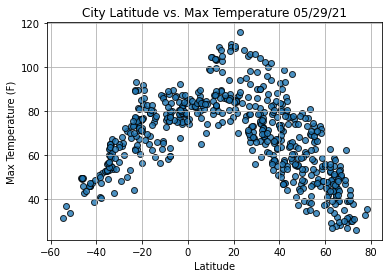

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

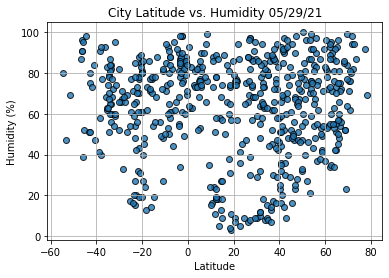

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

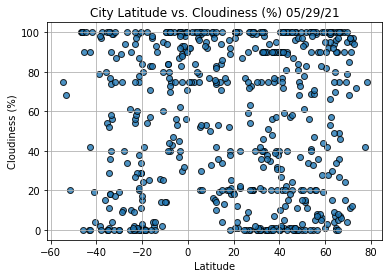

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

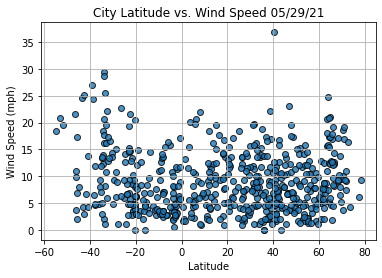

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()